In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [3]:
df = pd.read_csv("files/endedico01.csv")

df

,Unnamed: 0,name,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date
0,0,CratD2C,CRATD2C,IEO,$1.21 M,$160 M,—,Binance coin,Blockchain,—,"Dec 17, 2024"
1,1,Nexade,NEXD,SHO on DAO Maker,—,$70 M,—,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024"
2,2,Swing,SWING,Public Sale,$9.75 M,$60 M,+7,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024"
3,3,Help Steps,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024"
4,4,Ringfence,-,Airdrop,$1.5 M,—,+6,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024"
...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,NEO,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98x,"Aug 31, 2016"
1813,1813,DigixDAO,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01x,"Apr 7, 2016"
1814,1814,Nem,XEM,Pre-launch Public Auction,$70 K,$231.03 M,—,Fenbushi Capital,Blockchain,2332x,"May 1, 2015"
1815,1815,Stellar,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120x,"Q1, 2015"


In [4]:
# Function to replace quarters with the first day of the quarter (month first, then day)
def clean_datetime(date):
    # add month and day for short date
    if len(date) < 8:
        return "Jan 1, " +date

    # replace_quarter
    if 'Q1' in date:
        return date.replace('Q1', 'Jan 1')
    elif 'Q2' in date:
        return date.replace('Q2', 'Apr 1')
    elif 'Q3' in date:
        return date.replace('Q3', 'Jul 1')
    elif 'Q4' in date:
        return date.replace('Q4', 'Oct 1')
    else:
        return date

# Apply the function to the 'date' column
df['date'] = df['date'].apply(clean_datetime)


In [5]:
df

,Unnamed: 0,name,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date
0,0,CratD2C,CRATD2C,IEO,$1.21 M,$160 M,—,Binance coin,Blockchain,—,"Dec 17, 2024"
1,1,Nexade,NEXD,SHO on DAO Maker,—,$70 M,—,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024"
2,2,Swing,SWING,Public Sale,$9.75 M,$60 M,+7,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024"
3,3,Help Steps,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024"
4,4,Ringfence,-,Airdrop,$1.5 M,—,+6,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024"
...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,NEO,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98x,"Aug 31, 2016"
1813,1813,DigixDAO,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01x,"Apr 7, 2016"
1814,1814,Nem,XEM,Pre-launch Public Auction,$70 K,$231.03 M,—,Fenbushi Capital,Blockchain,2332x,"May 1, 2015"
1815,1815,Stellar,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120x,"Jan 1, 2015"


In [6]:
df[df['date'].str.len()<8]

,Unnamed: 0,name,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date


In [7]:
# Data cleaning

# Remove the first 2 columns
df = df.drop(df.columns[:2], axis=1)

df.head()

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date
0,CRATD2C,IEO,$1.21 M,$160 M,—,Binance coin,Blockchain,—,"Dec 17, 2024"
1,NEXD,SHO on DAO Maker,—,$70 M,—,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024"
2,SWING,Public Sale,$9.75 M,$60 M,+7,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024"
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024"
4,-,Airdrop,$1.5 M,—,+6,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024"


In [8]:
df['round'].unique()

array(['IEO', 'SHO on DAO Maker', 'Public Sale', 'Airdrop',
       'IDO on Legion', 'IDO on Polkastarter', 'IDO on ChainGPT',
       'Node Sale Round', 'NFT Sale', 'Binance Launchpool',
       'IDO on SeaPad', 'Whitelist Sale', 'IDO on Decubate',
       'IDO on Chainboost', 'IDO on Impossible Finance', 'IDO on Seedify',
       'Launchpool on Bitget', 'Incentivized Activities',
       'IDO on KingdomStarter', 'IDO on BSCS', 'Presale',
       'IDO on Gagarin', 'Testnet', 'Public Round', 'IDO on Spores',
       'Points Farming', 'IDO on OpenPad', 'IDO on Poolz', 'Tap-to-Earn',
       'IEO on Gate.io', 'IDO on Ordify', 'Retroactive Airdrop',
       'IDO on Ape Terminal', 'IDO on Magic Square', 'IDO on Finceptor',
       'Launchpool on Bybit', 'IDO on xLaunchpad', 'IDO on Kommunitas',
       'GemPool on Kucoin', 'IDO on Bounce', 'Presale Round 2',
       'Funding Round', 'IDO on Eesee', 'Seed Round', 'Community Auction',
       'Patron Sale', 'Staking Pool', 'ITO', 'IDO on DAO Maker',
     

In [9]:
# Identify rows containing " on " and split them into two columns
df[['method', 'platform']] = df['round'].str.split(' on ', expand=True)
df['method'] = df['method'].fillna(df['round'])
df['platform'] = df['platform'].fillna('')
df

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform
0,CRATD2C,IEO,$1.21 M,$160 M,—,Binance coin,Blockchain,—,"Dec 17, 2024",IEO,
1,NEXD,SHO on DAO Maker,—,$70 M,—,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024",SHO,DAO Maker
2,SWING,Public Sale,$9.75 M,$60 M,+7,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024",Public Sale,
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024",SHO,DAO Maker
4,-,Airdrop,$1.5 M,—,+6,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024",Airdrop,
...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98x,"Aug 31, 2016",Main Sale,
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01x,"Apr 7, 2016",Initial Coin Offering,
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,—,Fenbushi Capital,Blockchain,2332x,"May 1, 2015",Pre-launch Public Auction,
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120x,"Jan 1, 2015",Public Sale,


In [10]:
df["raised"].unique()

array(['$1.21 M', '—', '$9.75 M', '$1.5 M', '$90.9 M', '$3.45 M', '$16 M',
       '$200 K', '$1.69 M', '$20 M', '$4.7 M', '$25 M', '$1.9 M', '$7 M',
       '$4.6 M', '$1.1 M', '$6.3 M', '$28 K', '$500 K', '$700 K',
       '$396 K', '$36 M', '$27.9 M', '$100 K', '$23.8 M', '$2.5 M',
       '$73.78 M', '$41.4 M', '$10 M', '$11.35 M', '$9.28 M', '$2.52 M',
       '$20.2 M', '$135 K', '$5 M', '$750 K', '$1.8 M', '$5.01 M',
       '$7.75 M', '$350 K', '$11 M', '$6 M', '$1.18 M', '$150 K',
       '$325 M', '$2 M', '$3.75 M', '$1.68 M', '$3.12 M', '$4 M', '$3 M',
       '$159.5 M', '$5.2 M', '$10.5 M', '$275 K', '$1.27 M', '$24.27 M',
       '$12.4 M', '$17.6 M', '$2.1 M', '$83 M', '$3.5 M', '$7.5 M',
       '$3.69 M', '$268 K', '$1.84 M', '$9.2 M', '$32.3 M', '$130.58 M',
       '$14.38 M', '$1.56 M', '$990 K', '$15 M', '$1.09 M', '$658 M',
       '$1.07 M', '$250 K', '$1.7 M', '$1.25 M', '$88 M', '$28.79 M',
       '$480 K', '$17.5 M', '$553 K', '$7.23 M', '$23.19 M', '$3.02 M',
       '$15

In [11]:
# Function to clean and convert the "raised" or "pre_valuation" column
def clean_money_column(value):
    if value == '—':
        return None  # Handle missing values
    value = value.replace('$', '').replace(',', '').replace('Calculated','')
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    if 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000
    if 'T' in value:
        return float(value.replace('T', '')) * 1_000_000_000_000
    return float(value)

# Apply the function to the "raised" column
df['raised_cleaned'] = df['raised'].apply(clean_money_column)

# Apply the function to the "pre_valuation" column
df['pre_valuation_cleaned'] = df['pre_valuation'].apply(clean_money_column)

# Display the cleaned DataFrame
df


,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned
0,CRATD2C,IEO,$1.21 M,$160 M,—,Binance coin,Blockchain,—,"Dec 17, 2024",IEO,,1210000.0,1.600000e+08
1,NEXD,SHO on DAO Maker,—,$70 M,—,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024",SHO,DAO Maker,NaN,7.000000e+07
2,SWING,Public Sale,$9.75 M,$60 M,+7,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024",Public Sale,,9750000.0,6.000000e+07
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024",SHO,DAO Maker,NaN,5.000000e+06
4,-,Airdrop,$1.5 M,—,+6,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024",Airdrop,,1500000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98x,"Aug 31, 2016",Main Sale,,105060000.0,1.490000e+09
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01x,"Apr 7, 2016",Initial Coin Offering,,6750000.0,5.000000e-02
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,—,Fenbushi Capital,Blockchain,2332x,"May 1, 2015",Pre-launch Public Auction,,70000.0,2.310300e+08
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120x,"Jan 1, 2015",Public Sale,,5010000.0,1.856000e+10


In [12]:
df[df["pre_valuation"].str.contains('24')]

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned
16,STAGE,IDO on Decubate,$4.6 M,$19.24 M,+9,Moonrock Capital,Social,1.55x,"Dec 8, 2024",IDO,Decubate,4600000.0,1.924000e+07
76,SMILE,Launchpool on Bybit,$10 M,$24.05 M,+15,OKX Ventures,DeFi,0.21x,"Oct 31, 2024",Launchpool,Bybit,10000000.0,2.405000e+07
199,MUL,LBP on Fjord,$650 K,$824.9 K,NaN,Kronos Research,DEX,—,"May 21, 2024",LBP,Fjord,650000.0,8.249000e+05
327,EVO,IDO on Gate.io,$3.66 M,$24 M,—,Animoca Brands,Gaming,—,"Jan 22, 2024",IDO,Gate.io,3660000.0,2.400000e+07
379,NTRN,Binance Launchpool,$10 M,$385.24 M,+3,Binance Labs,Infrastructure,4.29x,"Oct 11, 2023",Binance Launchpool,,10000000.0,3.852400e+08
400,AMS,IEO on Gate.io,$3.36 M,$24 MCalculated,+2,Gate.io,Gaming,—,"Aug 15, 2023",IEO,Gate.io,3360000.0,2.400000e+07
434,MVK,Main Sale,—,$24 M,—,IDEO CoLab Ventures,Gaming,—,"May 11, 2023",Main Sale,,NaN,2.400000e+07
486,CGPT,IDO on Seedify,$1.91 M,$248.03 M,NaN,YAY Network,Artificial Intellig…,31x,"Apr 7, 2023",IDO,Seedify,1910000.0,2.480300e+08
507,HXD,Main Sale,—,$24.92 M,—,Oddiyana Ventures,Gaming,0.71x,"Mar 14, 2023",Main Sale,,NaN,2.492000e+07
565,FACTR,IDO on TrustPad,$14.2 M,$14.24 M,+3,BD Venture,DeFi,0.69x,"Nov 9, 2022",IDO,TrustPad,14200000.0,1.424000e+07


In [13]:
df['investors']

0         —
1         —
2        +7
3       NaN
4        +6
       ... 
1812    NaN
1813    NaN
1814      —
1815    NaN
1816      —
Name: investors, Length: 1817, dtype: object

In [14]:
# Replace '—' with NaN
df['investors'] = df['investors'].replace('—', np.nan)

# Remove '+' signs and convert to numeric
df['investors'] = df['investors'].str.replace('+', '').astype(float)

# Display the cleaned DataFrame
df

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned
0,CRATD2C,IEO,$1.21 M,$160 M,NaN,Binance coin,Blockchain,—,"Dec 17, 2024",IEO,,1210000.0,1.600000e+08
1,NEXD,SHO on DAO Maker,—,$70 M,NaN,Binance coin,RWA (Real World Ass…,—,"Dec 13, 2024",SHO,DAO Maker,NaN,7.000000e+07
2,SWING,Public Sale,$9.75 M,$60 M,7.0,Arrington XRP Capital,Cross chain,—,"Dec 18, 2024",Public Sale,,9750000.0,6.000000e+07
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,—,"Dec 12, 2024",SHO,DAO Maker,NaN,5.000000e+06
4,-,Airdrop,$1.5 M,—,6.0,Morningstar Ventures,Blockchain Service,—,"Dec 9, 2024",Airdrop,,1500000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98x,"Aug 31, 2016",Main Sale,,105060000.0,1.490000e+09
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01x,"Apr 7, 2016",Initial Coin Offering,,6750000.0,5.000000e-02
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,NaN,Fenbushi Capital,Blockchain,2332x,"May 1, 2015",Pre-launch Public Auction,,70000.0,2.310300e+08
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120x,"Jan 1, 2015",Public Sale,,5010000.0,1.856000e+10


In [15]:
df['roi']

0            —
1            —
2            —
3            —
4            —
         ...  
1812    82.98x
1813     0.01x
1814     2332x
1815      120x
1816    10947x
Name: roi, Length: 1817, dtype: object

In [16]:
# Replace '—' with NaN
df['roi'] = df['roi'].replace('—', np.nan)

# Remove 'x' character and convert to float
df['roi'] = df['roi'].str.replace('x', '').astype(float)

# Display the cleaned DataFrame
df


,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned
0,CRATD2C,IEO,$1.21 M,$160 M,NaN,Binance coin,Blockchain,NaN,"Dec 17, 2024",IEO,,1210000.0,1.600000e+08
1,NEXD,SHO on DAO Maker,—,$70 M,NaN,Binance coin,RWA (Real World Ass…,NaN,"Dec 13, 2024",SHO,DAO Maker,NaN,7.000000e+07
2,SWING,Public Sale,$9.75 M,$60 M,7.0,Arrington XRP Capital,Cross chain,NaN,"Dec 18, 2024",Public Sale,,9750000.0,6.000000e+07
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,NaN,"Dec 12, 2024",SHO,DAO Maker,NaN,5.000000e+06
4,-,Airdrop,$1.5 M,—,6.0,Morningstar Ventures,Blockchain Service,NaN,"Dec 9, 2024",Airdrop,,1500000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98,"Aug 31, 2016",Main Sale,,105060000.0,1.490000e+09
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01,"Apr 7, 2016",Initial Coin Offering,,6750000.0,5.000000e-02
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,NaN,Fenbushi Capital,Blockchain,2332.00,"May 1, 2015",Pre-launch Public Auction,,70000.0,2.310300e+08
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120.00,"Jan 1, 2015",Public Sale,,5010000.0,1.856000e+10


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ticker                 1817 non-null   object 
 1   round                  1817 non-null   object 
 2   raised                 1817 non-null   object 
 3   pre_valuation          1817 non-null   object 
 4   investors              834 non-null    float64
 5   ecosystem              1817 non-null   object 
 6   categories             1815 non-null   object 
 7   roi                    1493 non-null   float64
 8   date                   1817 non-null   object 
 9   method                 1817 non-null   object 
 10  platform               1817 non-null   object 
 11  raised_cleaned         1544 non-null   float64
 12  pre_valuation_cleaned  1719 non-null   float64
dtypes: float64(4), object(9)
memory usage: 184.7+ KB


In [18]:
df.describe()

,investors,roi,raised_cleaned,pre_valuation_cleaned
count,834.000000,1.493000e+03,1.544000e+03,1.719000e+03
mean,9.943645,3.115925e+13,2.556095e+07,8.458150e+10
std,7.608231,1.203973e+15,1.369354e+08,2.082329e+12
min,1.000000,1.000000e-02,9.000000e+01,-1.255000e+07
25%,4.000000,1.000000e-02,1.500000e+06,3.030000e+05
50%,8.000000,9.000000e-02,4.270000e+06,7.840000e+06
75%,14.000000,1.000000e+00,1.450000e+07,5.783500e+07
max,46.000000,4.652076e+16,4.210000e+09,6.530000e+13


In [19]:
df['raised_cleaned'].sum()

np.float64(39466112520.0)

In [20]:
df.isnull().sum()

ticker                     0
round                      0
raised                     0
pre_valuation              0
investors                983
ecosystem                  0
categories                 2
roi                      324
date                       0
method                     0
platform                   0
raised_cleaned           273
pre_valuation_cleaned     98
dtype: int64

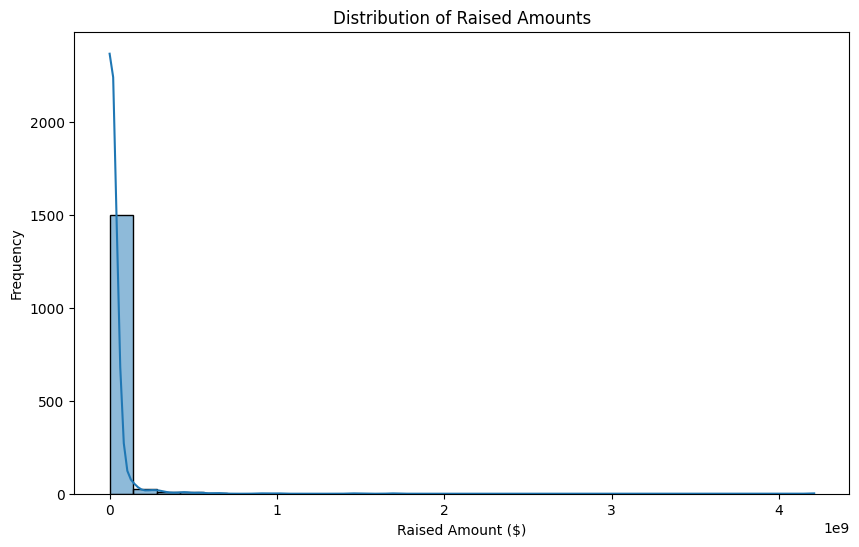

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['raised_cleaned'].dropna(), bins=30, kde=True)
plt.title('Distribution of Raised Amounts')
plt.xlabel('Raised Amount ($)')
plt.ylabel('Frequency')
plt.show()


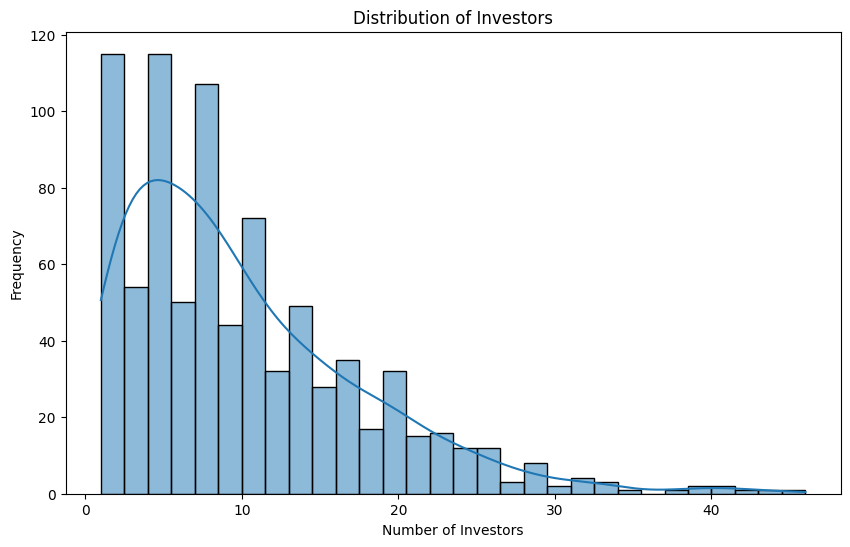

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['investors'].dropna(), bins=30, kde=True)
plt.title('Distribution of Investors')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.show()


In [23]:
# top 10 by roi
print(df[['ticker', 'roi']].sort_values(by='roi', ascending=False).head(10))


     ticker           roi
1798    OPT  4.652076e+16
1435   URAC  9.329045e+06
1789    BMC  7.643556e+05
1794    TRX  6.615789e+05
1750   STAR  4.135130e+05
1423    XRD  3.707000e+04
1816    ETH  1.094700e+04
1414   VELT  5.000000e+03
1814    XEM  2.332000e+03
1631    FND  1.546000e+03


/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/3997209593.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ecosystem', y='raised_cleaned', estimator=sum, ci=None)


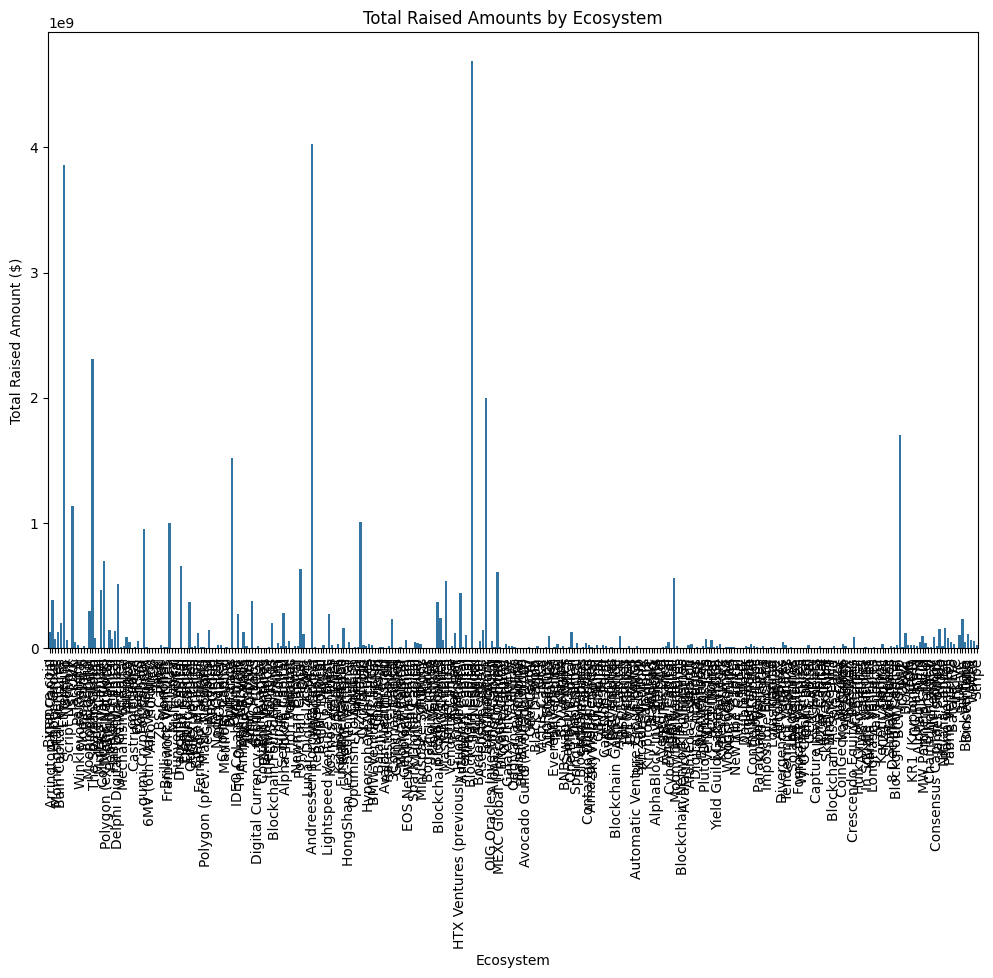

In [24]:
# raised by ecosystem
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='ecosystem', y='raised_cleaned', estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total Raised Amounts by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Total Raised Amount ($)')
plt.show()


In [25]:
# Group by ecosystem and sum the raised_cleaned amounts
ecosystem_raised = df.groupby('ecosystem')['raised_cleaned'].sum().reset_index()

# Sort by raised_cleaned in descending order
top_raised_ecosystem = ecosystem_raised.sort_values(by='raised_cleaned', ascending=False)

# Display the top raised ecosystem
top_raised_ecosystem


,ecosystem,raised_cleaned
96,Blockchain Capital,4.687050e+09
39,Andreessen Horowitz (a16z),4.027190e+09
157,Ethereum,3.858704e+09
82,Binance Labs,2.310324e+09
3,1confirmation,1.996620e+09
...,...,...
249,NFX,0.000000e+00
210,Kava,0.000000e+00
144,Defined,0.000000e+00
303,The Open Network,0.000000e+00


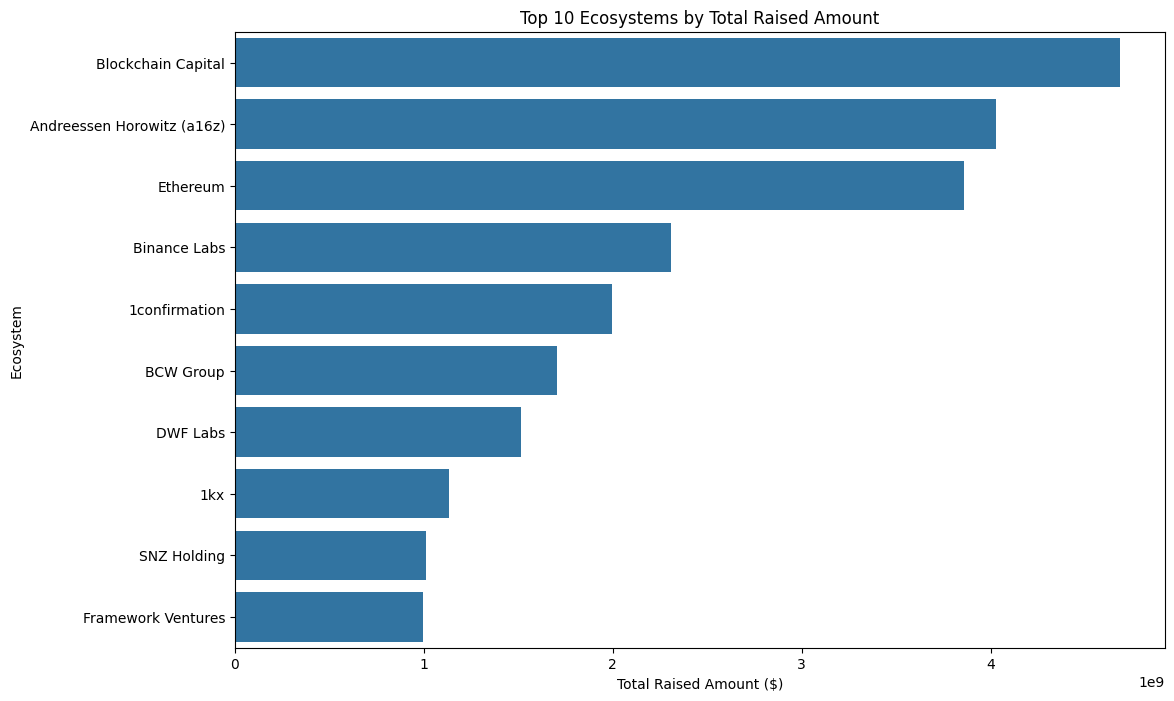

In [26]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_raised_ecosystem.head(10), x='raised_cleaned', y='ecosystem')
plt.title('Top 10 Ecosystems by Total Raised Amount')
plt.xlabel('Total Raised Amount ($)')
plt.ylabel('Ecosystem')
plt.show()

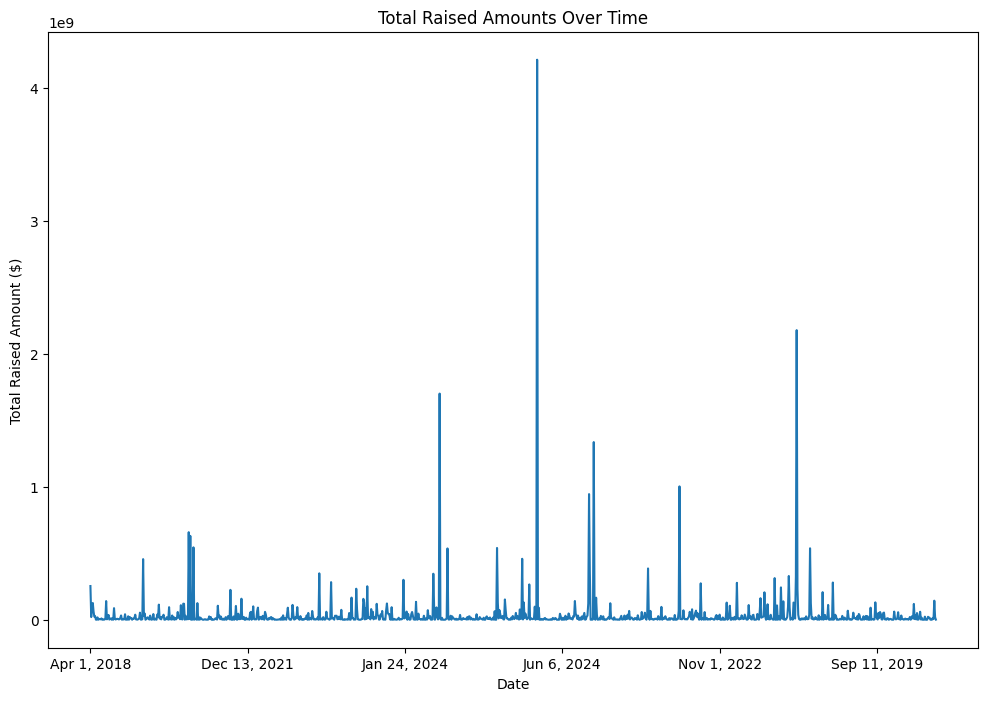

In [27]:
plt.figure(figsize=(12, 8))
df.groupby('date')['raised_cleaned'].sum().plot()
plt.title('Total Raised Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Raised Amount ($)')
plt.show()


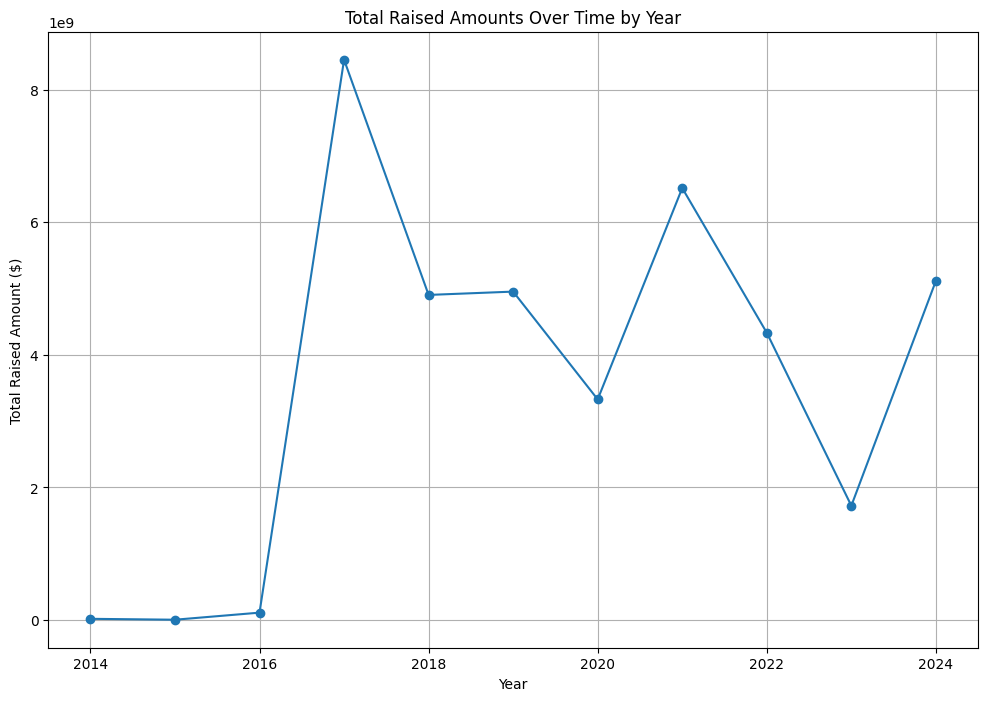

In [28]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year


# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Group by year and sum the 'raised_cleaned' amounts
yearly_raised = df.groupby('year')['raised_cleaned'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_raised['year'], yearly_raised['raised_cleaned'], marker='o')
plt.title('Total Raised Amounts Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Raised Amount ($)')
plt.grid(True)
plt.show()

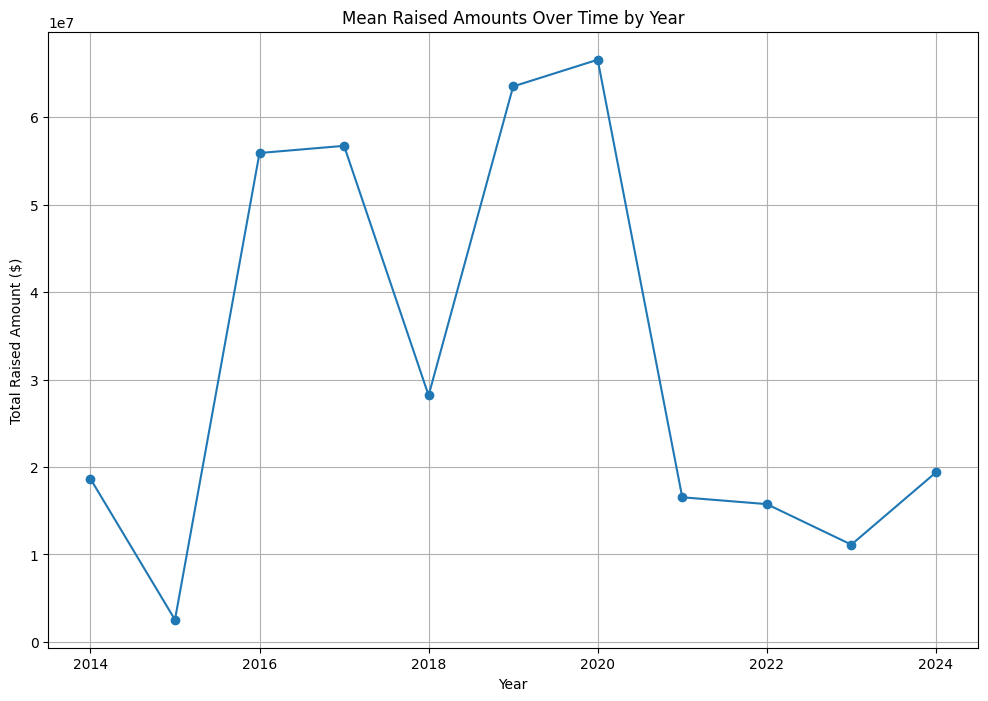

In [29]:
# Group by year and mean the 'raised_cleaned' amounts
yearly_raised = df.groupby('year')['raised_cleaned'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_raised['year'], yearly_raised['raised_cleaned'], marker='o')
plt.title('Mean Raised Amounts Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Raised Amount ($)')
plt.grid(True)
plt.show()

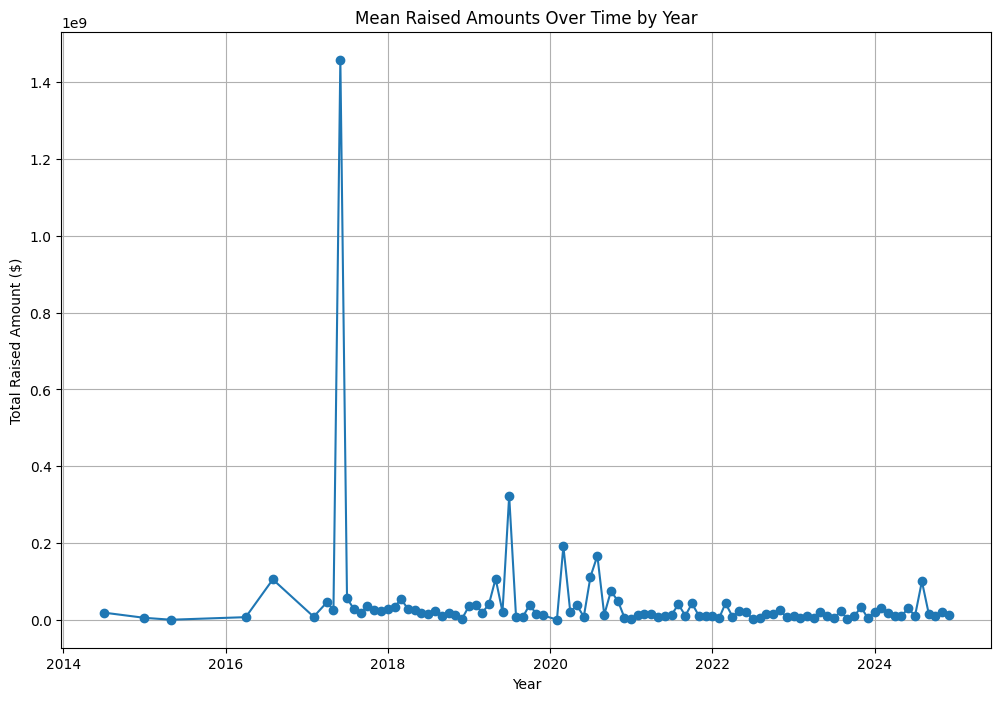

In [30]:
# Group by year and mean the 'raised_cleaned' amounts
yearly_raised = df.groupby(['year','month'])['raised_cleaned'].mean().reset_index()

# Combine year and month into a single datetime column for plotting
yearly_raised['year_month'] = pd.to_datetime(yearly_raised[['year', 'month']].assign(day=1))

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_raised['year_month'], yearly_raised['raised_cleaned'], marker='o')
plt.title('Mean Raised Amounts Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Raised Amount ($)')
plt.grid(True)
plt.show()

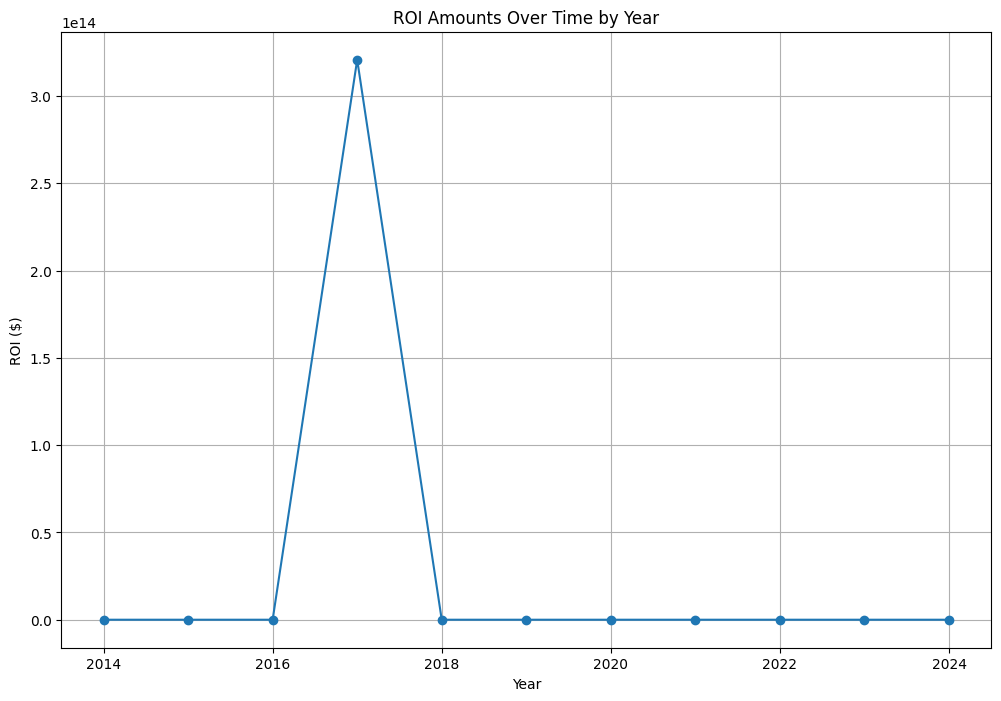

In [31]:
# Group by year and mean the 'roi' amounts
yearly_roi = df.groupby('year')['roi'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_roi['year'], yearly_roi['roi'], marker='o')
plt.title('ROI Amounts Over Time by Year')
plt.xlabel('Year')
plt.ylabel('ROI ($)')
plt.grid(True)
plt.show()

/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/178744245.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2019]
/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/178744245.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2014]
/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/178744245.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2016]


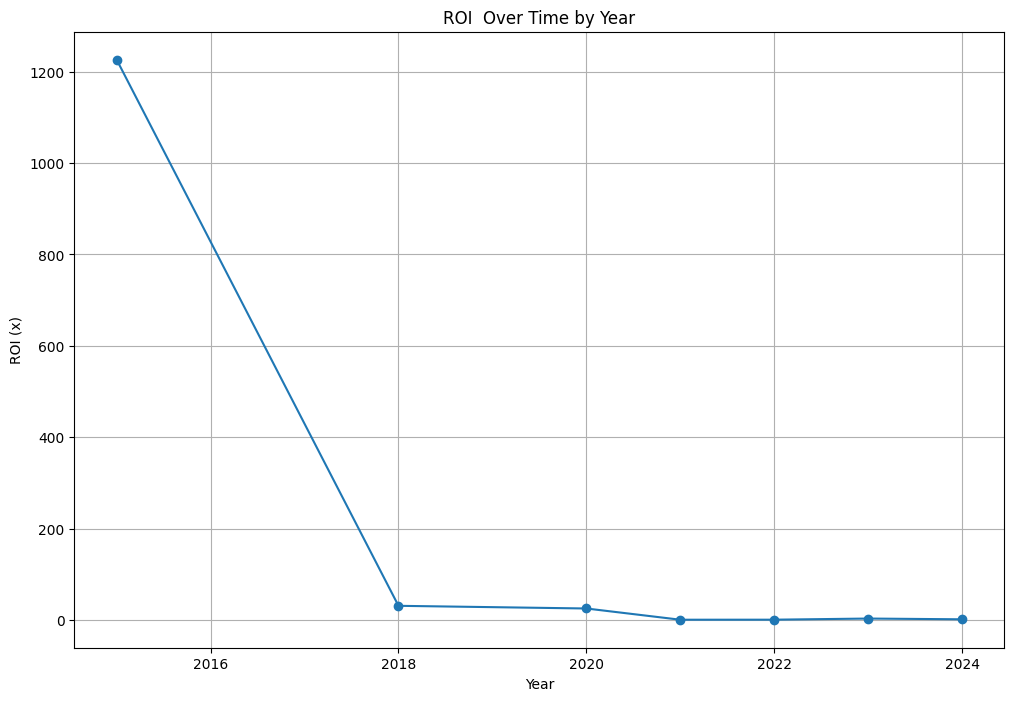

In [32]:
# Filter out the year 2017
yearly_roi1 = yearly_roi[yearly_roi['year'] != 2017]
yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2019]
yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2014]
yearly_roi1 = yearly_roi1[yearly_roi['year'] != 2016]
# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_roi1['year'], yearly_roi1['roi'], marker='o')
plt.title('ROI  Over Time by Year')
plt.xlabel('Year')
plt.ylabel('ROI (x)')
plt.grid(True)
plt.show()

In [33]:
yearly_roi

,year,roi
0,2014,1.094700e+04
1,2015,1.226000e+03
2,2016,4.149500e+01
3,2017,3.208328e+14
4,2018,3.109955e+01
5,2019,1.007730e+05
6,2020,2.524109e+01
7,2021,6.698039e-01
8,2022,7.419557e-01
9,2023,3.239625e+00


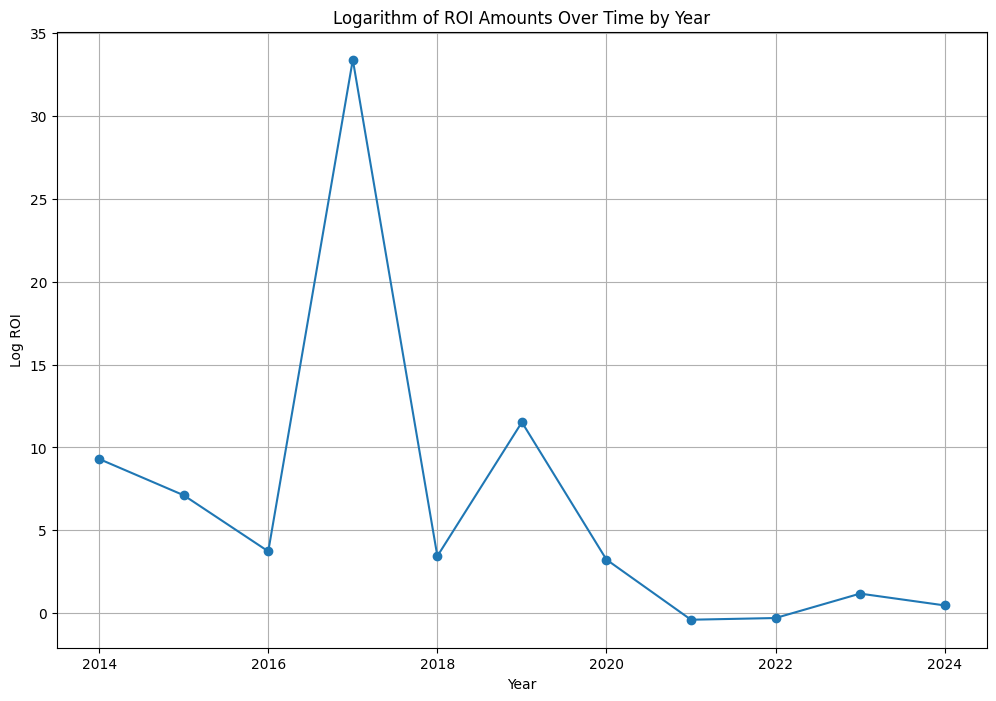

In [34]:
yearly_roi['log_roi'] = np.log(yearly_roi['roi'])

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_roi['year'], yearly_roi['log_roi'], marker='o')
plt.title('Logarithm of ROI Amounts Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Log ROI')
plt.grid(True)
plt.show()


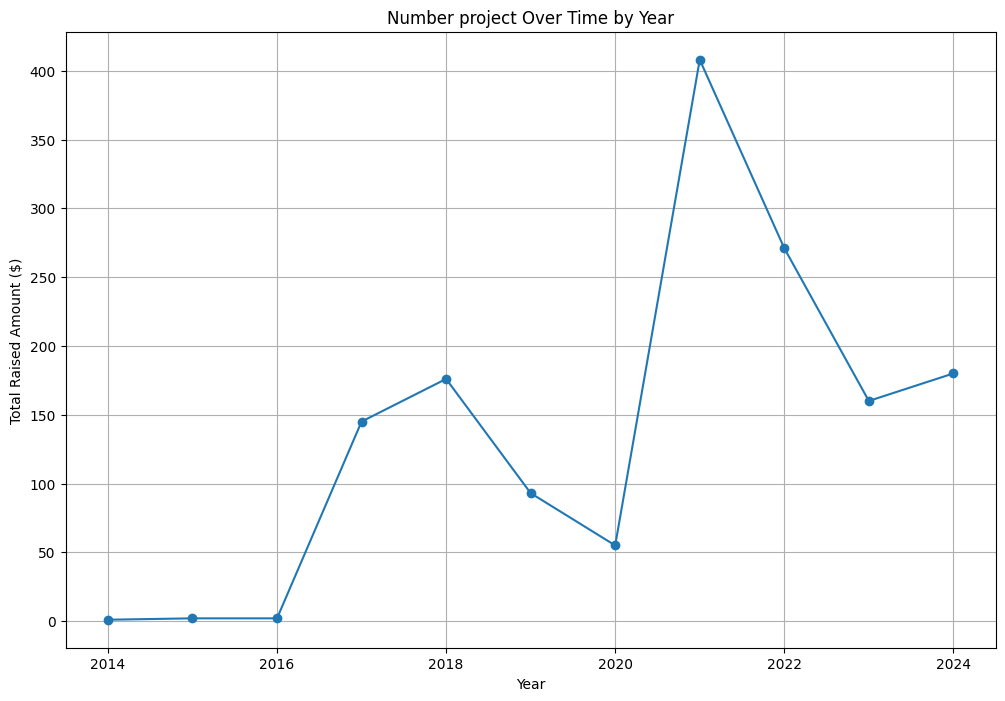

In [35]:
# Group by year and mean the 'roi' amounts
yearly_roi = df.groupby('year')['roi'].count().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_roi['year'], yearly_roi['roi'], marker='o')
plt.title('Number project Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Raised Amount ($)')
plt.grid(True)
plt.show()

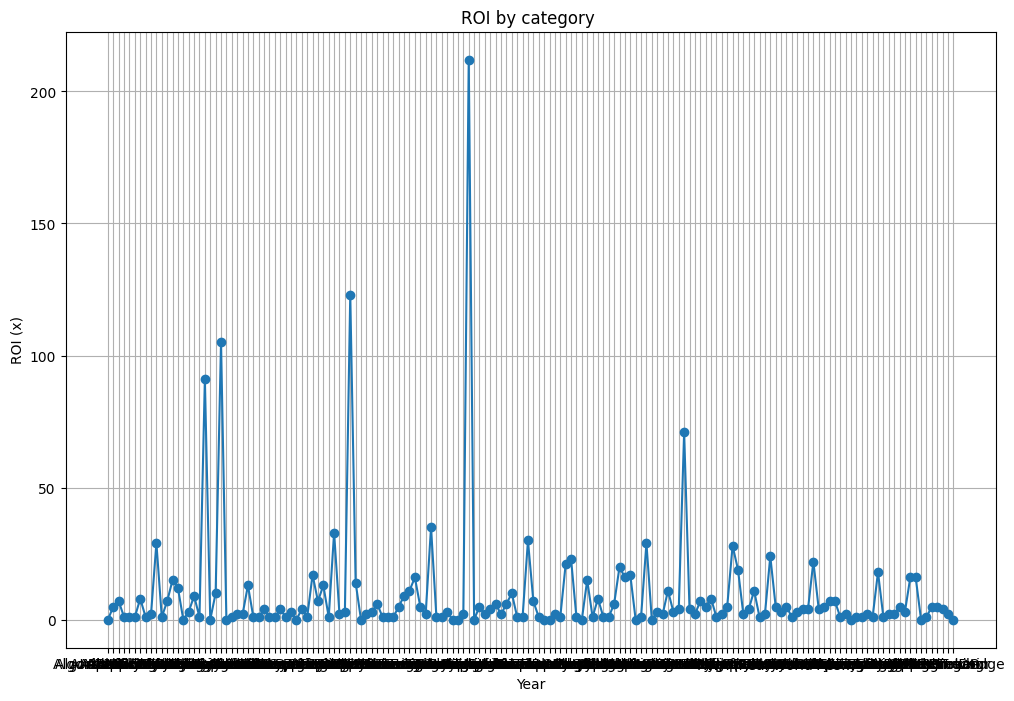

In [36]:
# Group by category and mean the 'roi' amounts
cat_roi = df.groupby('categories')['roi'].count().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(cat_roi['categories'], cat_roi['roi'], marker='o')
plt.title('ROI by category ')
plt.xlabel('Year')
plt.ylabel('ROI (x)')
plt.grid(True)
plt.show()

In [37]:
# Sort by count and get the top 10 categories
top_cat_roi = cat_roi.sort_values(by='roi', ascending=False).head(10)

In [38]:
top_cat_roi

,categories,roi
67,Gaming,212
45,DeFi,123
21,Blockchain Service,105
18,Blockchain,91
107,NFT,71
60,Finance,35
42,DEX,33
78,Infrastructure,30
100,Metaverse,29
9,Artificial Intellig…,29


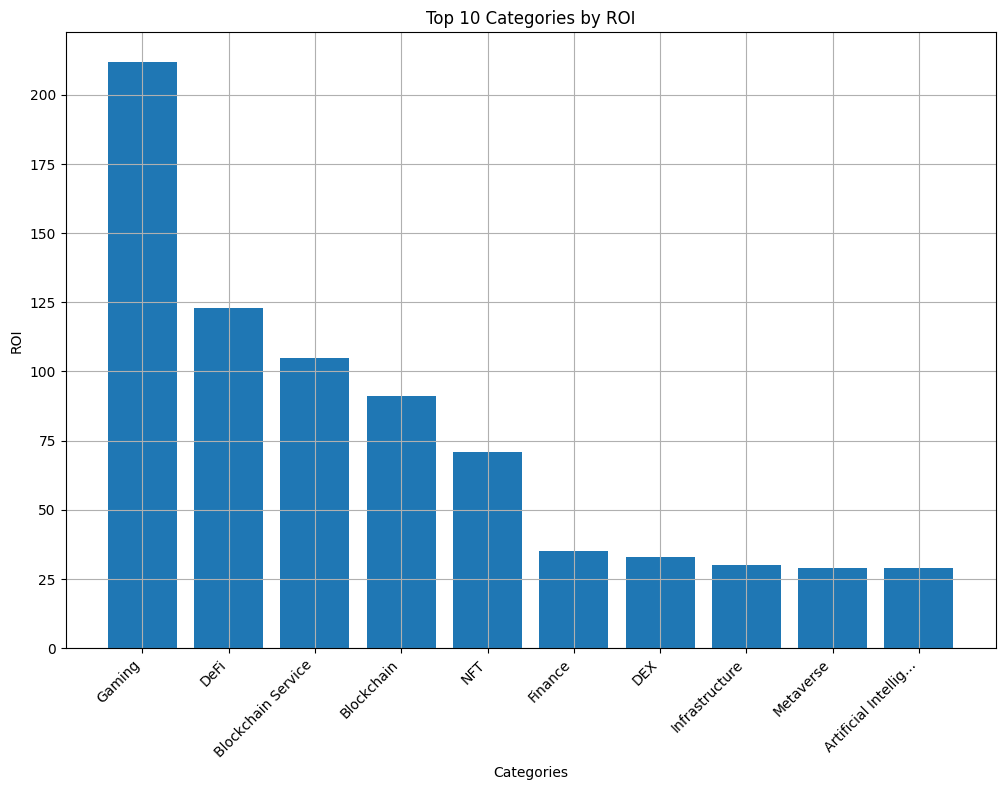

In [39]:
# Plot
plt.figure(figsize=(12, 8))
plt.bar(top_cat_roi['categories'], top_cat_roi['roi'])
plt.title('Top 10 Categories by ROI')
plt.xlabel('Categories')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [40]:
df['roi'].median(), df['roi'].mean()

(np.float64(0.09), np.float64(31159250844764.94))

In [41]:
split = df['roi']>1
split.value_counts()

roi
False    1511
True      306
Name: count, dtype: int64

<Axes: xlabel='roi'>

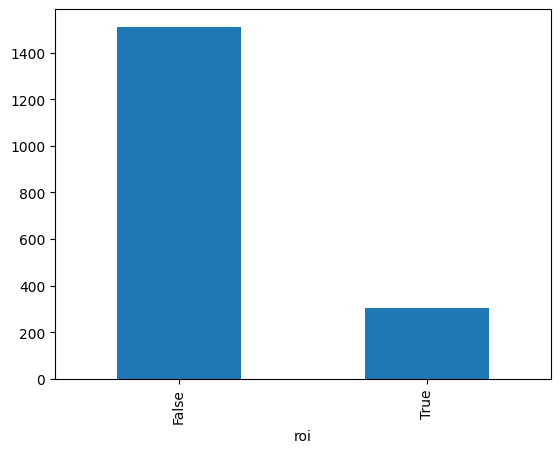

In [42]:
split.value_counts().plot(kind="bar")

In [43]:
df['goodico'] = df['roi']>1

In [44]:
df

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned,year,month,goodico
0,CRATD2C,IEO,$1.21 M,$160 M,NaN,Binance coin,Blockchain,NaN,2024-12-17,IEO,,1210000.0,1.600000e+08,2024,12,False
1,NEXD,SHO on DAO Maker,—,$70 M,NaN,Binance coin,RWA (Real World Ass…,NaN,2024-12-13,SHO,DAO Maker,NaN,7.000000e+07,2024,12,False
2,SWING,Public Sale,$9.75 M,$60 M,7.0,Arrington XRP Capital,Cross chain,NaN,2024-12-18,Public Sale,,9750000.0,6.000000e+07,2024,12,False
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,NaN,2024-12-12,SHO,DAO Maker,NaN,5.000000e+06,2024,12,False
4,-,Airdrop,$1.5 M,—,6.0,Morningstar Ventures,Blockchain Service,NaN,2024-12-09,Airdrop,,1500000.0,NaN,2024,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98,2016-08-31,Main Sale,,105060000.0,1.490000e+09,2016,8,True
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01,2016-04-07,Initial Coin Offering,,6750000.0,5.000000e-02,2016,4,False
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,NaN,Fenbushi Capital,Blockchain,2332.00,2015-05-01,Pre-launch Public Auction,,70000.0,2.310300e+08,2015,5,True
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120.00,2015-01-01,Public Sale,,5010000.0,1.856000e+10,2015,1,True


In [45]:
def refactortop10(df, column):
    # Calculate the top 9 rounds
    top_rounds = df[column].value_counts().nlargest(9).index
    df[column] = df[column].apply(lambda x: x if x in top_rounds else 'Other')
    return df

In [46]:
df1 = df[['ticker','round','investors','ecosystem','categories','method','platform','goodico']]
df1

,ticker,round,investors,ecosystem,categories,method,platform,goodico
0,CRATD2C,IEO,NaN,Binance coin,Blockchain,IEO,,False
1,NEXD,SHO on DAO Maker,NaN,Binance coin,RWA (Real World Ass…,SHO,DAO Maker,False
2,SWING,Public Sale,7.0,Arrington XRP Capital,Cross chain,Public Sale,,False
3,HSX,SHO on DAO Maker,NaN,Amber Group,Move To Earn,SHO,DAO Maker,False
4,-,Airdrop,6.0,Morningstar Ventures,Blockchain Service,Airdrop,,False
...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,NaN,Chain Capital,Blockchain,Main Sale,,True
1813,DGD,Initial Coin Offering,NaN,Fenbushi Capital,DAO,Initial Coin Offering,,False
1814,XEM,Pre-launch Public Auction,NaN,Fenbushi Capital,Blockchain,Pre-launch Public Auction,,True
1815,XLM,Public Sale,NaN,Stripe,Blockchain,Public Sale,,True


In [47]:
for column in ['round','investors','ecosystem','categories','method','platform']:
    refactortop10(df1, column)

df1

/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/3441063037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: x if x in top_rounds else 'Other')
/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/3441063037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: x if x in top_rounds else 'Other')
/var/folders/zh/g_gf_j_s13l4g_rmzlh9125w0000gn/T/ipykernel_19473/3441063037.py:4: SettingWithCopyWarning: 

,ticker,round,investors,ecosystem,categories,method,platform,goodico
0,CRATD2C,Other,Other,Binance coin,Blockchain,IEO,,False
1,NEXD,Other,Other,Binance coin,Other,Other,DAO Maker,False
2,SWING,Public Sale,7.0,Other,Other,Public Sale,,False
3,HSX,Other,Other,Other,Other,Other,DAO Maker,False
4,-,Airdrop,6.0,Morningstar Ventures,Blockchain Service,Airdrop,,False
...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,Other,Other,Blockchain,Main Sale,,True
1813,DGD,Other,Other,Other,Other,Initial Coin Offering,,False
1814,XEM,Other,Other,Other,Blockchain,Other,,True
1815,XLM,Public Sale,Other,Other,Blockchain,Public Sale,,True


In [48]:
# add goodico : True 4 times

dftrue = df1[df1['goodico']==True]
dftrue

,ticker,round,investors,ecosystem,categories,method,platform,goodico
5,FUEL,Other,Other,Other,Other,IDO,Other,True
7,GLS,Public Sale,Other,Other,Artificial Intellig…,Public Sale,,True
8,EARNM,Other,Other,Other,Other,IDO,Other,True
16,STAGE,Other,9.0,Other,Other,IDO,Other,True
18,PEN,Other,6.0,Binance Labs,Gaming,IDO,Other,True
...,...,...,...,...,...,...,...,...
1810,ATOM,Other,5.0,Other,Blockchain,Other,,True
1812,NEO,Main Sale,Other,Other,Blockchain,Main Sale,,True
1814,XEM,Other,Other,Other,Blockchain,Other,,True
1815,XLM,Public Sale,Other,Other,Blockchain,Public Sale,,True


In [49]:
for i in range(4):
    df1 = pd.concat([df1, dftrue])


<Axes: xlabel='goodico'>

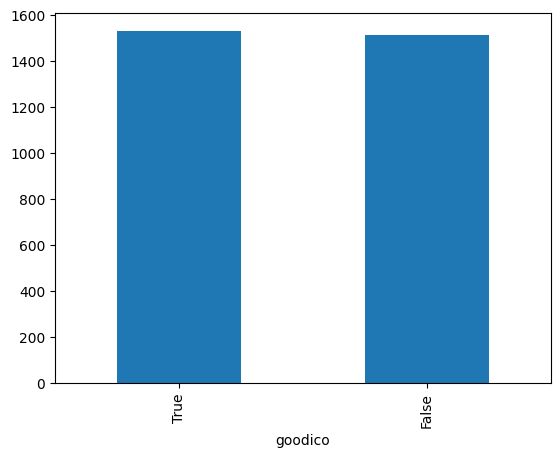

In [50]:
df1['goodico'].value_counts().plot(kind="bar")

In [51]:

# Preprocess the data
df1 = df1.fillna('Other')
df1 = df1.drop("ticker", axis=1)
df1['goodico'] = df['goodico'].astype(int)

# Encode categorical variables
df_encoded = pd.get_dummies(df1, columns=['round', 'investors', 'ecosystem', 'categories', 'method', 'platform'])

# Split the data into training and testing sets
X = df_encoded.drop('goodico', axis=1)
y = df_encoded['goodico']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature importance:')
print(feature_importance)


Accuracy: 74.88%
Feature importance:
ecosystem_Binance Labs                                0.063703
categories_Blockchain                                 0.058088
categories_Blockchain Service                         0.044992
method_Other                                          0.041941
categories_Other                                      0.039179
investors_5.0                                         0.037054
platform_                                             0.035707
investors_2.0                                         0.035395
categories_Gaming                                     0.033777
investors_Other                                       0.033212
categories_Artificial Intellig…                       0.028017
investors_3.0                                         0.026168
ecosystem_Ethereum                                    0.025335
round_Public Sale                                     0.025114
ecosystem_DWF Labs                                    0.023465
method_Launchpool 

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Feature importance
feature_importance = pd.Series(best_rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature importance:')
print(feature_importance)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END m

[Text(0.8854291504839624, 0.9883720930232558, 'x[22] <= 0.5\ngini = 0.5\nsamples = 2432\nvalue = [1198, 1234]'),
 Text(0.8063408786031487, 0.9651162790697675, 'x[31] <= 0.5\ngini = 0.499\nsamples = 2164\nvalue = [1137, 1027]'),
 Text(0.8458850145435556, 0.9767441860465116, 'True  '),
 Text(0.7682437924884085, 0.9418604651162791, 'x[9] <= 0.5\ngini = 0.494\nsamples = 1964\nvalue = [1089, 875]'),
 Text(0.7317055467788289, 0.9186046511627907, 'x[30] <= 0.5\ngini = 0.488\nsamples = 1745\nvalue = [1007, 738]'),
 Text(0.702950384999559, 0.8953488372093024, 'x[46] <= 0.5\ngini = 0.483\nsamples = 1671\nvalue = [988.0, 683.0]'),
 Text(0.6734324801609491, 0.872093023255814, 'x[53] <= 0.5\ngini = 0.48\nsamples = 1646\nvalue = [986.0, 660.0]'),
 Text(0.6470544923236479, 0.8488372093023255, 'x[21] <= 0.5\ngini = 0.483\nsamples = 1608\nvalue = [951.0, 657.0]'),
 Text(0.6082947260090101, 0.8255813953488372, 'x[24] <= 0.5\ngini = 0.481\nsamples = 1576\nvalue = [943, 633]'),
 Text(0.5774292245796182, 0

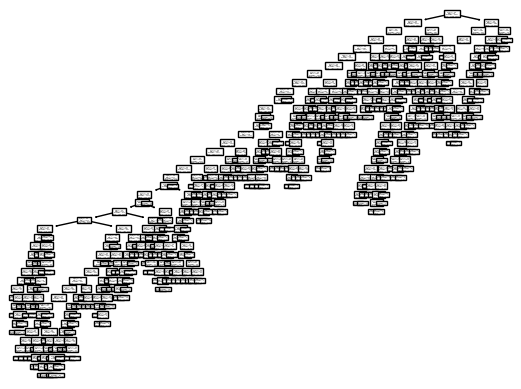

In [60]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'x[22] <= 0.5\ngini = 0.5\nsamples = 2432\nvalue = [1198, 1234]'),
 Text(0.25, 0.625, 'x[31] <= 0.5\ngini = 0.499\nsamples = 2164\nvalue = [1137, 1027]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[9] <= 0.5\ngini = 0.494\nsamples = 1964\nvalue = [1089, 875]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[25] <= 0.5\ngini = 0.365\nsamples = 200\nvalue = [48, 152]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[36] <= 0.5\ngini = 0.352\nsamples = 268\nvalue = [61, 207]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[47] <= 0.5\ngini = 0.298\nsamples = 242\nvalue = [44, 198]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[11] <= 0.5\ngini = 0.453\nsamples = 26\nvalue = [17, 9]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

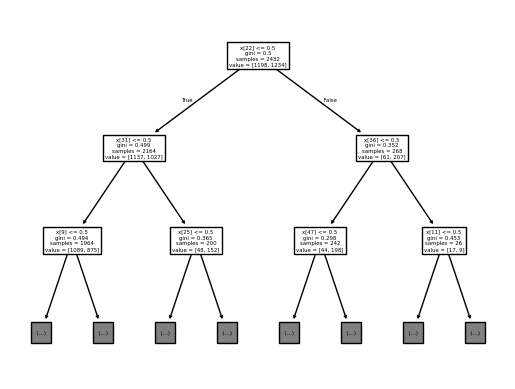

In [53]:
from sklearn import tree

tree.plot_tree(clf, max_depth=2)

# how many funded crypto was dead? what is average life time
 

In [54]:
df

,ticker,round,raised,pre_valuation,investors,ecosystem,categories,roi,date,method,platform,raised_cleaned,pre_valuation_cleaned,year,month,goodico
0,CRATD2C,IEO,$1.21 M,$160 M,NaN,Binance coin,Blockchain,NaN,2024-12-17,IEO,,1210000.0,1.600000e+08,2024,12,False
1,NEXD,SHO on DAO Maker,—,$70 M,NaN,Binance coin,RWA (Real World Ass…,NaN,2024-12-13,SHO,DAO Maker,NaN,7.000000e+07,2024,12,False
2,SWING,Public Sale,$9.75 M,$60 M,7.0,Arrington XRP Capital,Cross chain,NaN,2024-12-18,Public Sale,,9750000.0,6.000000e+07,2024,12,False
3,HSX,SHO on DAO Maker,—,$5 M,NaN,Amber Group,Move To Earn,NaN,2024-12-12,SHO,DAO Maker,NaN,5.000000e+06,2024,12,False
4,-,Airdrop,$1.5 M,—,6.0,Morningstar Ventures,Blockchain Service,NaN,2024-12-09,Airdrop,,1500000.0,NaN,2024,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,NEO,Main Sale,$105.06 M,$1.49 B,NaN,Chain Capital,Blockchain,82.98,2016-08-31,Main Sale,,105060000.0,1.490000e+09,2016,8,True
1813,DGD,Initial Coin Offering,$6.75 M,$0.05,NaN,Fenbushi Capital,DAO,0.01,2016-04-07,Initial Coin Offering,,6750000.0,5.000000e-02,2016,4,False
1814,XEM,Pre-launch Public Auction,$70 K,$231.03 M,NaN,Fenbushi Capital,Blockchain,2332.00,2015-05-01,Pre-launch Public Auction,,70000.0,2.310300e+08,2015,5,True
1815,XLM,Public Sale,$5.01 M,$18.56 B,NaN,Stripe,Blockchain,120.00,2015-01-01,Public Sale,,5010000.0,1.856000e+10,2015,1,True


In [55]:
df2 =  df
df2['isDead'] = df2['roi']<0.05

df2['isDead'].value_counts()

isDead
False    1165
True      652
Name: count, dtype: int64

<Axes: title={'center': 'Dead ico percentage'}, ylabel='proportion'>

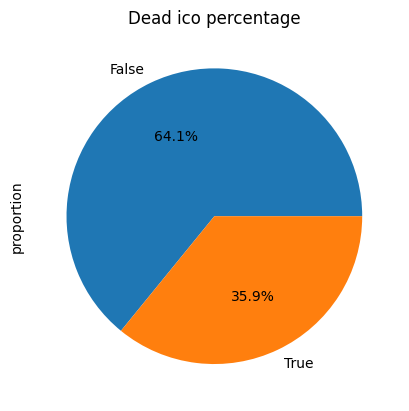

In [56]:
df2.isDead.value_counts(normalize=True).plot(kind="pie", autopct='%1.1f%%', title="Dead ico percentage")

In [57]:
dfyeardead=df[['year','isDead']]

dfyeardead

,year,isDead
0,2024,False
1,2024,False
2,2024,False
3,2024,False
4,2024,False
...,...,...
1812,2016,False
1813,2016,True
1814,2015,False
1815,2015,False


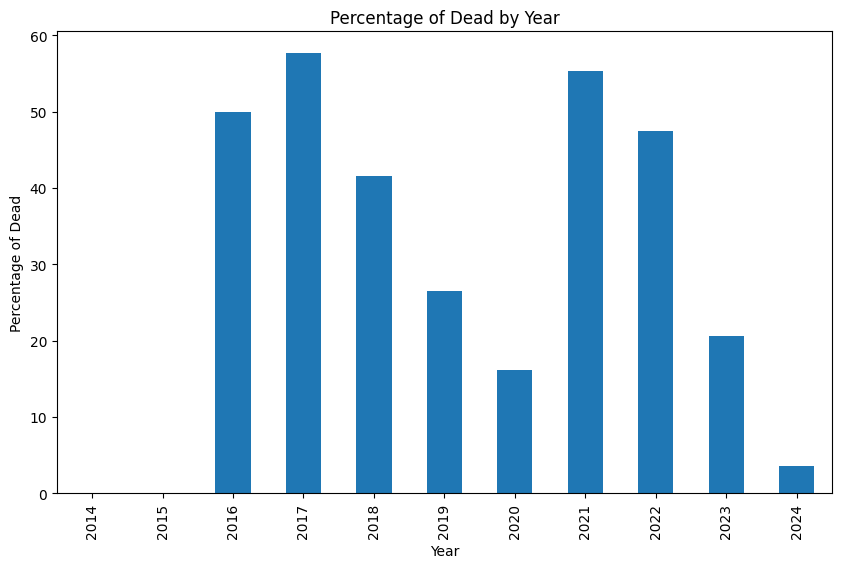

In [333]:
# Calculate the percentage of 'isDead' by year
dead_percent_by_year = dfyeardead.groupby('year')['isDead'].mean() * 100

# Plot the data
plt.figure(figsize=(10, 6))
dead_percent_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Percentage of Dead')
plt.title('Percentage of Dead by Year')
plt.show()


## I use coinmarketcap data to get ico life duration

https://www.kaggle.com/datasets/jakenty1/coinmarketcap-ico-data



In [336]:
dfcmc = pd.read_csv('./files/cmc_data.csv')

dfcmc.lifeday.describe()

count    1220.000000
mean      636.477869
std       251.899808
min         4.000000
25%       513.000000
50%       660.000000
75%       819.000000
max      1692.000000
Name: lifeday, dtype: float64

Text(0.5, 1.0, "ICO projects' lifetime distribution (days)")

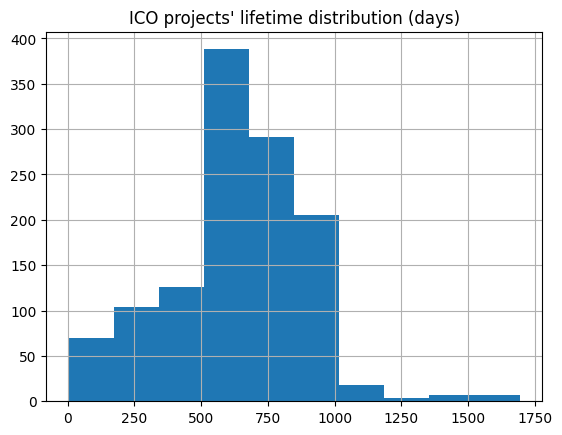

In [338]:
dfcmc.lifeday.hist()
plt.title('ICO projects\' lifetime distribution (days)')